
# Análise das intenções de voto da eleição presidencial de 2018

Renato Naville Watanabe
renato.watanabe@ufabc.edu.br

In [303]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

In [304]:
import pandas as pd
P = pd.read_csv('pesq2T.csv')
P

,dia,Haddad,Bolsonaro,Branco/Nulo,Não sabe,Peso,STD,Identificação,Metodo
0,10,36,49,8,6,1.00,1.0,"Datafolha, 10/10, Nacional",Presencial
1,9,22,63,11,5,0.01,1.0,"Paraná, 11/10, DF",Presencial
2,9,36,51,10,4,1.00,1.5,"XP/Ipespe,11/10, Nacional",Telefone
3,14,35,51,9,5,1.00,1.0,BTG,Telefone
4,12,26,59,10,5,0.22,1.0,"Paraná, SP",Presencial
5,10,26,59,10,5,0.11,1.0,"Paraná, MG",Presencial
6,14,37,52,9,2,1.00,1.0,Ibope,Presencial
7,13,33,48,11,8,1.00,1.0,RealTimeData,Presencial
8,15,25,60,10,5,0.08,1.0,"Paraná, RJ",Presencial
9,16,34,53,9,4,1.00,1.0,"Parná, Nacional",Presencial


In [305]:
#Pn = P.loc[P['Metodo']=='Presencial']
Pn = P
candidatos = list(Pn)[1:5]
dia = np.array(Pn.dia)
pesquisa = np.array(Pn.iloc[:,1:5])
peso = np.array(Pn.Peso)
W = np.diag(peso.astype(float))
std = np.array(Pn.STD)
metodo = Pn.Metodo

diaEleicao = 28 #28 de outubro. Dia 01 é 01 de Outubro


## Estimativa por ajuste de polinômio

Talvez seja útil para ver tendências

In [306]:
# Estimativa

Y = np.round(np.array(pesquisa))

xValores = np.reshape(np.array(dia).T, (len(dia),1))
# máximo expoente do polinômio é igual ao número de semanas , arredondado para baixo, menos 1
# esse número está associado ao número máximo de mudanças de tendência permitidas no ajuste 
# (p. ex. em  3 semanas é permitido no máximo duas mudanças de tendências)
# Isso é feito para evitar o que é conhecido como overfitting.

maxExp = 3

X = xValores**np.arange(0, maxExp+1)
Y

array([[36, 49,  8,  6],
       [22, 63, 11,  5],
       [36, 51, 10,  4],
       [35, 51,  9,  5],
       [26, 59, 10,  5],
       [26, 59, 10,  5],
       [37, 52,  9,  2],
       [33, 48, 11,  8],
       [25, 60, 10,  5],
       [34, 53,  9,  4],
       [32, 55, 10,  2],
       [30, 56, 10,  4],
       [37, 51,  8,  4],
       [50, 38,  9,  3],
       [32, 52, 11,  5],
       [27, 63,  8,  3],
       [35, 50, 10,  5],
       [31, 57,  9,  3],
       [35, 52,  8,  5],
       [37, 51, 13,  0],
       [46, 44,  7,  3],
       [59, 29,  8,  4],
       [36, 57,  6,  1],
       [32, 56,  8,  5],
       [20, 72,  6,  2],
       [23, 66,  7,  4],
       [35, 52,  8,  5],
       [27, 60,  9,  5],
       [37, 49, 11,  4],
       [37, 52,  7,  4],
       [37, 50, 10,  3],
       [33, 50, 14,  4],
       [26, 62,  9,  3],
       [31, 54, 11,  3],
       [37, 51,  8,  4],
       [30, 55, 10,  4],
       [27, 59,  9,  4],
       [38, 48,  8,  6],
       [37, 51, 10,  2],
       [34, 53,  9,  4],


Para encontrar os coeficientes dos polinômios que ajustam as intenções de cada candidato é utilizada a seguinte expressão:

$\beta = (X^TWX)^{-1}(X^TWY)$

In [307]:
beta = np.linalg.inv((X.T.dot(W)).dot(X)).dot(X.T.dot(W.dot(Y))) # regressão
beta

array([[ 4.38988886e+01,  4.19169424e+01,  1.66887063e+01,
        -2.78166851e+00],
       [-7.05270590e-01,  5.49313386e-01, -1.03968054e+00,
         1.26140377e+00],
       [-1.58431126e-02,  3.75006684e-02,  4.87032257e-02,
        -7.29169573e-02],
       [ 1.33617136e-03, -1.89621587e-03, -7.63291389e-04,
         1.32889216e-03]])

In [308]:
ultimoDia = max(dia)
hoje = 28
tempo = np.reshape(np.linspace(1, ultimoDia,ultimoDia+1),(ultimoDia+1,1))
tempoMatriz = tempo**[np.arange(0,maxExp+1)]
tempo2 = np.reshape(np.linspace(ultimoDia, hoje, hoje-ultimoDia+1),(hoje-ultimoDia+1,1))
tempoMatriz2 = tempo2**[np.arange(0,maxExp+1)]
VotEst = tempoMatriz.dot(beta)
VotEst2 = tempoMatriz2.dot(beta)

<IPython.core.display.Javascript object>


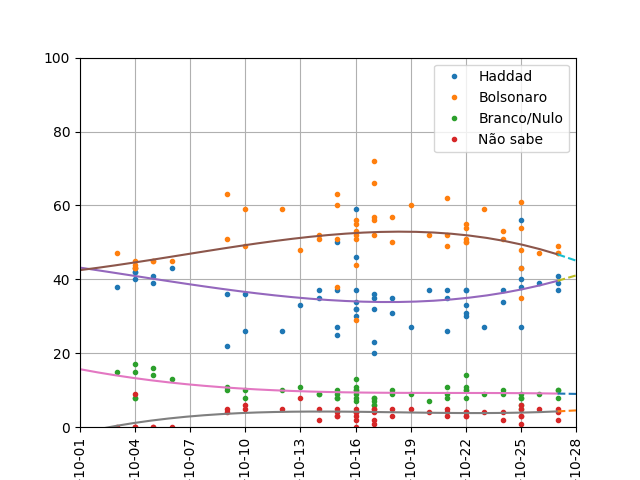

In [309]:
import matplotlib.dates as pltdat
import datetime
initData = 365*2018+397
datas = pltdat.num2date(tempo + initData)
datas2 = pltdat.num2date(tempo2 + initData)
diaDatas = pltdat.num2date(np.array(dia) + initData)
plt.figure()
plt.plot(diaDatas, Y, '.')
plt.plot(datas, VotEst)
plt.plot(datas2, VotEst2, '--')
plt.legend(np.array(candidatos))
plt.xticks(rotation='vertical')
plt.xlim(datas[0], pltdat.num2date(tempo2[-1] + initData))
plt.ylim(0,100)

plt.grid()
plt.show()

<IPython.core.display.Javascript object>


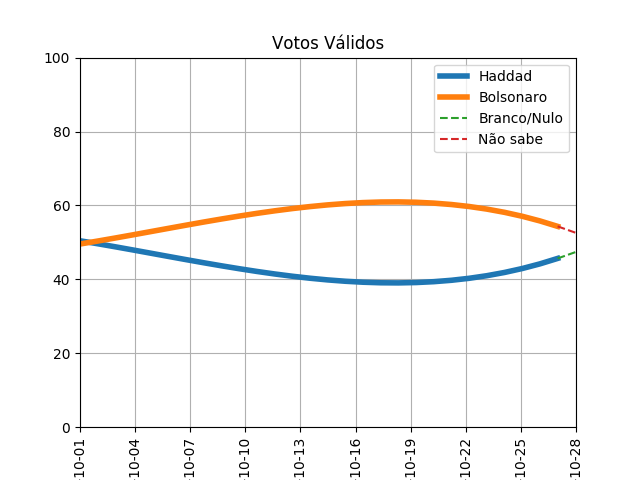

In [302]:
plt.figure()
plt.plot(datas, VotEst[:,0:2]/np.sum(VotEst[:,0:2],1, keepdims=True)*100, lw = 4)
plt.plot(datas2, VotEst2[:,0:2]/np.sum(VotEst2[:,0:2],1, keepdims=True)*100, '--')
plt.legend(np.array(candidatos))
plt.xticks(rotation='vertical')
plt.xlim(datas[0], pltdat.num2date(tempo2[-1] + initData))
plt.ylim(0,100)
plt.title('Votos Válidos')

plt.grid()
plt.show()

In [310]:
DG = 0
FG = 0

DT = 0
FT = 0

n = 50000

for i in range(n):
    Yincerteza = np.copy(Y)
    for j in range(Y.shape[0]):
        Yincerteza[j,:] = Y[j,:] + std[j]*np.random.randn(Y.shape[1])
    beta = np.linalg.inv((X.T.dot(W)).dot(X)).dot(X.T.dot(W.dot(Yincerteza)))
    VotEstIncerteza = tempoMatriz2.dot(beta)
    DT = DT + VotEstIncerteza[-1,0]
    FT = FT + VotEstIncerteza[-1,1]
    D = VotEstIncerteza[-1,0]
    F = VotEstIncerteza[-1,1]
    votos = np.array([D,F])
    primeiro = np.argmax(votos)
    if (primeiro == 0):
        DG = DG + 1
    if (primeiro == 1):
        FG = FG + 1
        
print(candidatos[0], ' tem ', round(DG/(DG+FG)*100), '% de chance de ganhar a eleição')
print(candidatos[1], ' tem', round(FG/(DG+FG)*100), '% de chance de ganhar a eleição')

print('\nResultado mais provável:\n')
print(candidatos[0], '- ', np.rint((DT)/(DT + FT)*1000)/10, '% votos válidos')
print(candidatos[1], '- ', np.rint((FT)/(DT + FT)*1000)/10, '% votos válidos')

Haddad  tem  0 % de chance de ganhar a eleição
Bolsonaro  tem 100 % de chance de ganhar a eleição

Resultado mais provável:

Haddad -  47.6 % votos válidos
Bolsonaro -  52.4 % votos válidos


## Estimativa por média móvel

Útil para analisar a real intenção de votos de cada candidato

In [294]:
def movWeightedAvg(time, Y, weight, window):
    weightedAvg = np.zeros((max(time)+1, np.size(Y,1)))
    for i in range(0,max(time)+1):
        minLim = i - window/2
        maxLim = i + window/2
        weightedSum = 0.0
        weightsSum = 0.0
        for j in range(len(time)):
            if minLim <= time[j] <= maxLim:
                weightedSum = weightedSum + Y[j,:]*peso[j]
                weightsSum = weightsSum + peso[j]
        weightedAvg[i] = weightedSum/weightsSum
    return weightedAvg

In [202]:
tamanhoDaJanela = 6 # a média é feita com intervalo de 1 semana
VotEstMovAvg = movWeightedAvg(dia, Y, peso, tamanhoDaJanela)

<IPython.core.display.Javascript object>


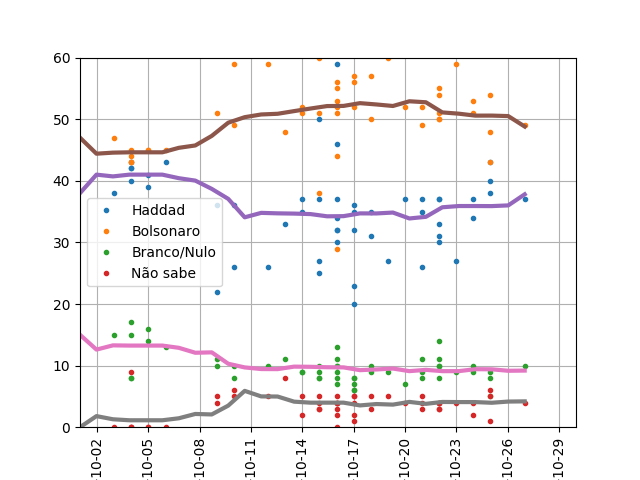

In [204]:
tempo2 = np.reshape(np.linspace(1, diaEleicao, diaEleicao),(diaEleicao,1))
plt.figure()
plt.plot(diaDatas, Y, '.')
plt.plot(datas, VotEstMovAvg, lw = 3)
plt.legend(np.array(candidatos))
plt.xticks(rotation='vertical')
plt.xlim(datas[0], pltdat.num2date(tempo2[-1] + 2 + initData))
plt.ylim(0,60)

plt.grid()
plt.show()

<IPython.core.display.Javascript object>


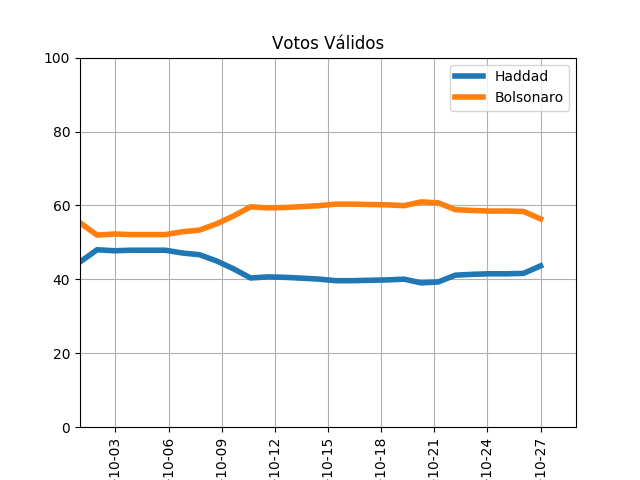

In [205]:
plt.figure()
plt.plot(datas, VotEstMovAvg[:,0:2]/np.sum(VotEstMovAvg[:,0:2],1, keepdims=True)*100, lw = 4)
plt.legend(np.array(candidatos))
plt.xticks(rotation='vertical')
plt.xlim(datas[0], pltdat.num2date(tempo2[-1] + 1 + initData))
plt.ylim(0,100)
plt.title('Votos Válidos')

plt.grid()
plt.show()

In [152]:
DG = 0
FG = 0


for i in range(10000):
    Yincerteza = np.copy(Y)
    for j in range(Y.shape[0]):
        Yincerteza[j,:] = Y[j,:] + std[j]*np.random.randn(Y.shape[1])
    VotEstMovAvgincerteza = movWeightedAvg(dia, Yincerteza, peso, tamanhoDaJanela)
    D = VotEstMovAvgincerteza[-1,0]
    F = VotEstMovAvgincerteza[-1,1]
    votos = np.array([D,F])
    primeiro = np.argmax(votos)
    if (primeiro == 0):
        DG = DG + 1
    if (primeiro == 1):
        FG = FG + 1
    
        
print(' Se a eleição fosse hoje:\n ')
print(candidatos[0], 'teria ', round(DG/(DG+FG)*100), '% de chance de ganhar a eleição')
print(candidatos[1], 'teria', round(FG/(DG+FG)*100), '% de chance de ganhar a eleição')


 Se a eleição fosse hoje:
 
Doria teria  100 % de chance de ganhar a eleição
França teria 0 % de chance de ganhar a eleição


In [48]:
VotEstIncerteza

array([[44.89891408, 43.03757327,  6.27280692,  4.09843836],
       [44.59108682, 44.91498323,  5.74385148,  3.55684077],
       [44.25029485, 47.25986823,  5.06835281,  2.89737002],
       [43.87886438, 50.11471837,  4.22784286,  2.11221926]])